In [8]:
%pylab inline
import corner
from astropy.io import fits
import os
DTDpath = os.getenv('DTD')

Populating the interactive namespace from numpy and matplotlib


/Users/sumits2k/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ndim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## RR Lyrae - Unbinned chains - Mixing Test

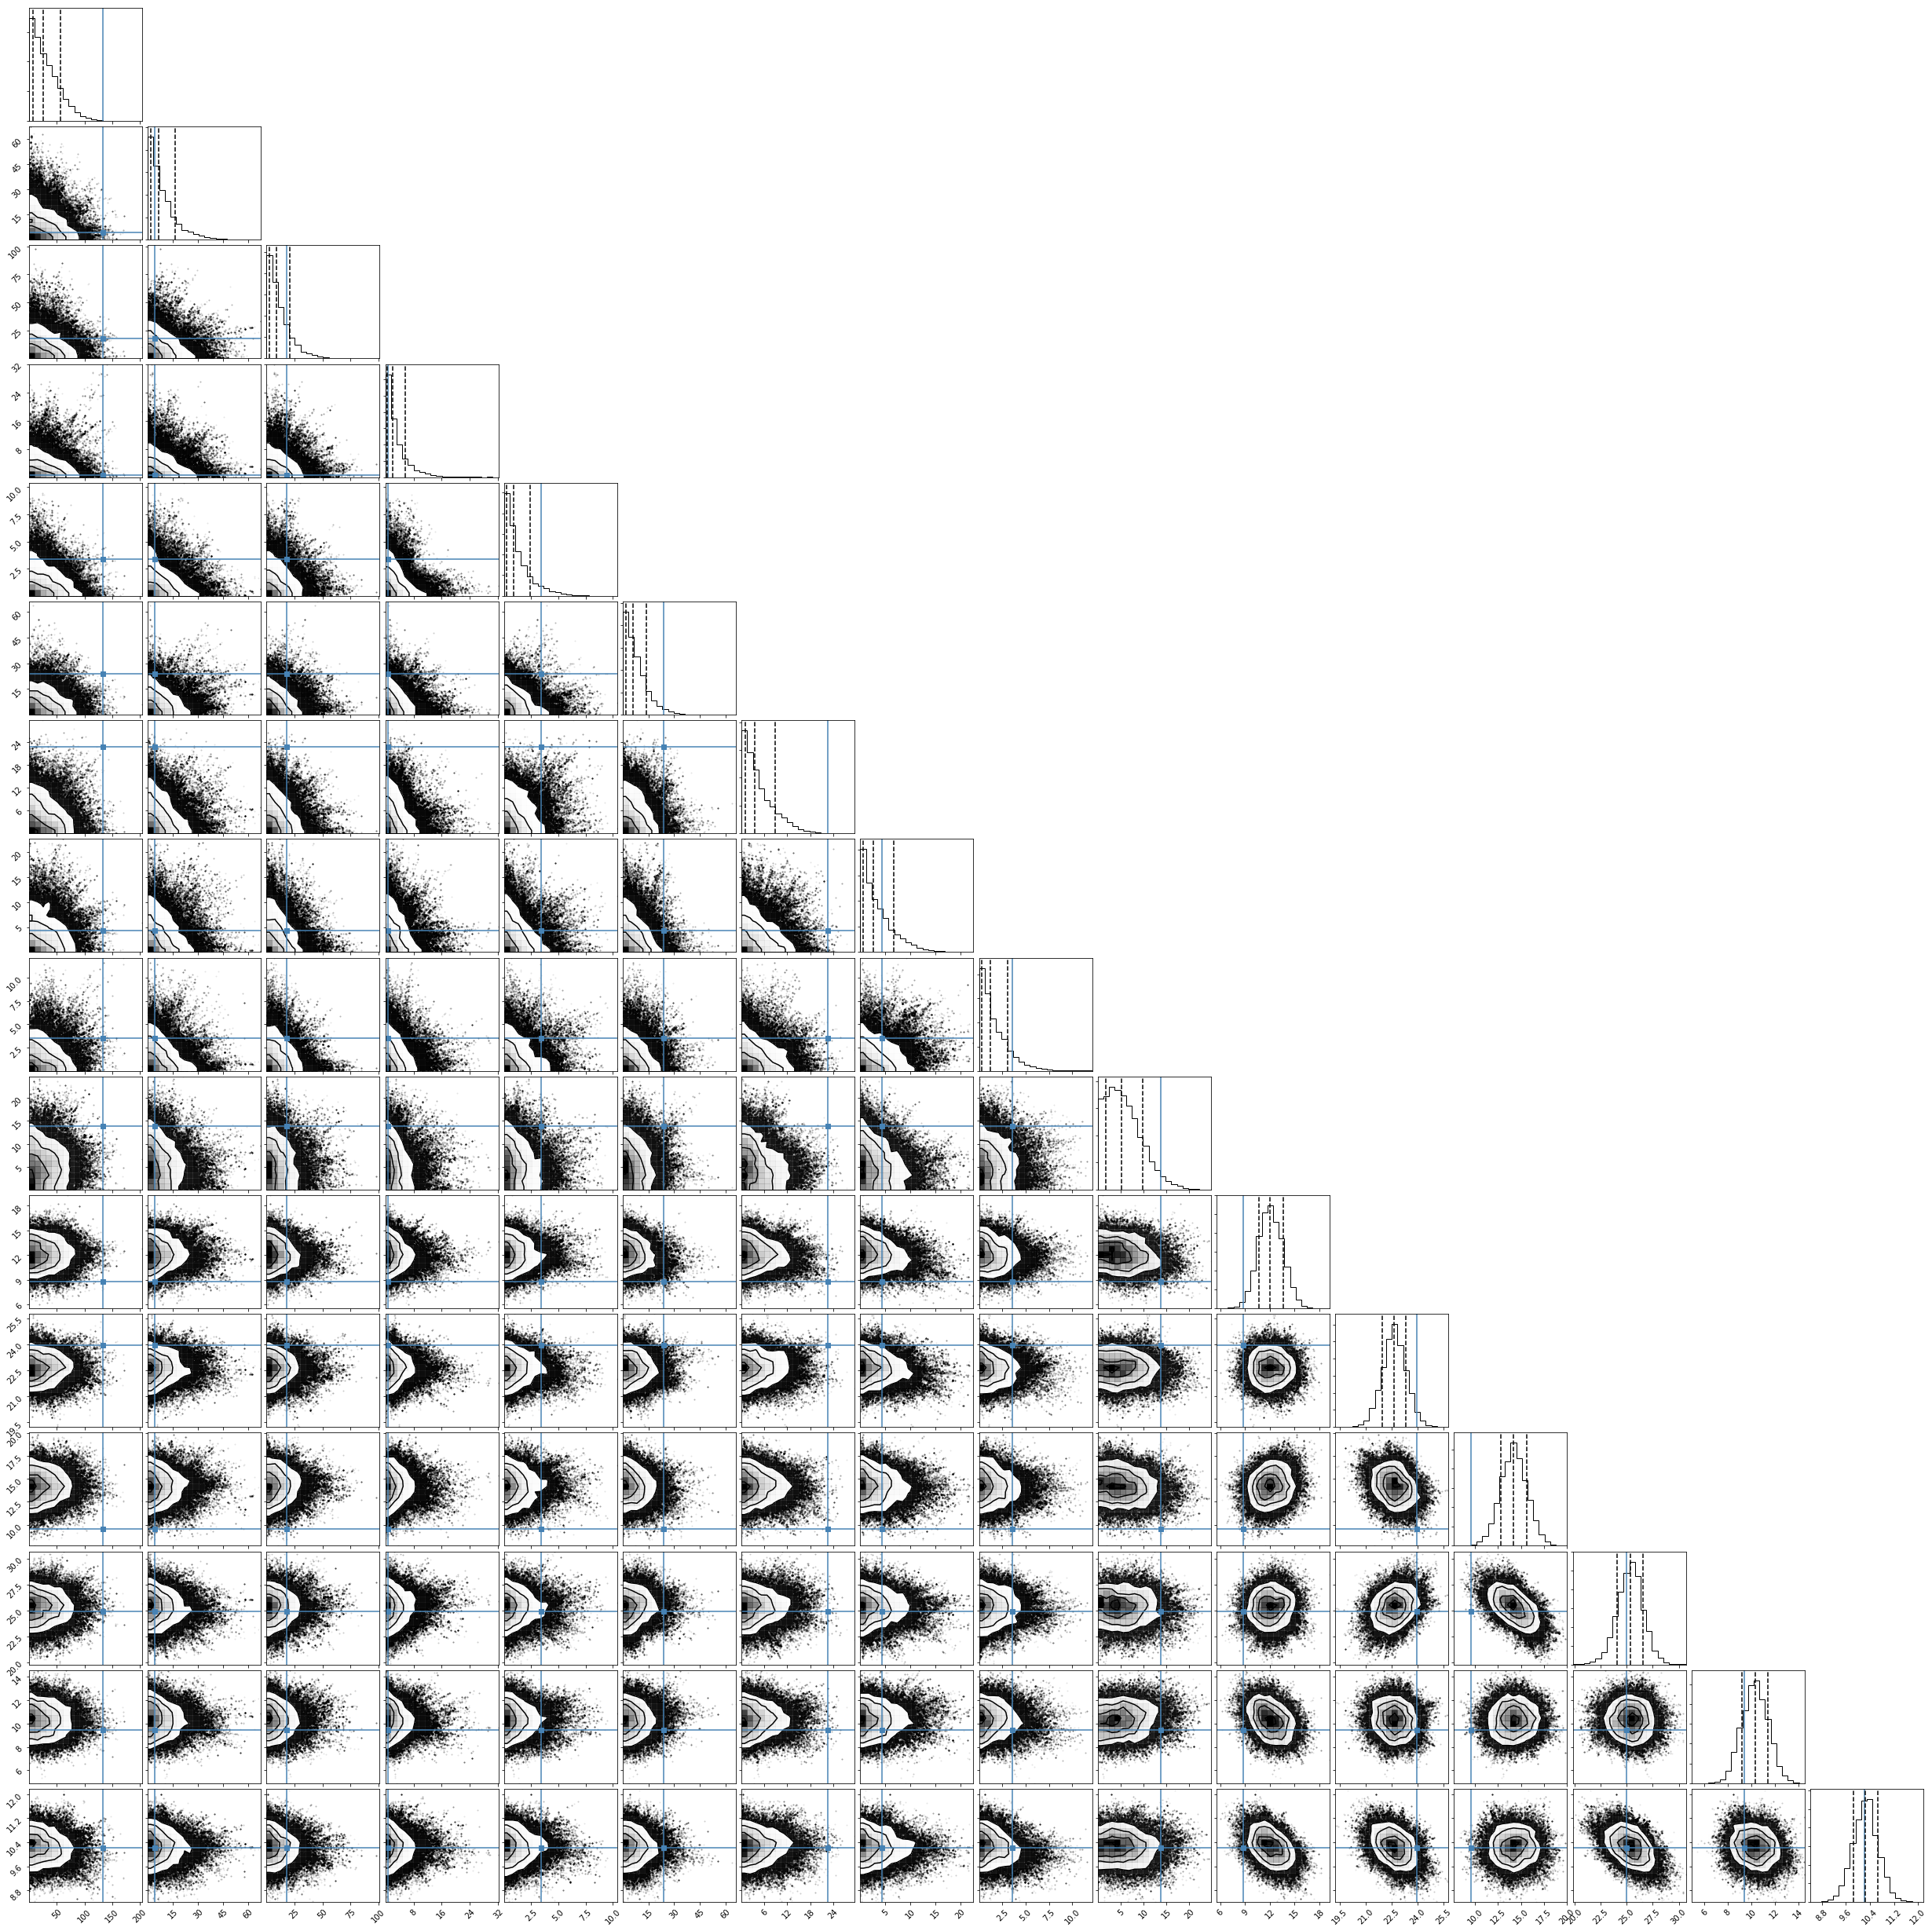

In [25]:
filePrefix = DTD + '/MCMC_DTD_fits/DTD_MixingTest/'
objName = 'RRLyrae'
subtypeName = 'All'

data, header = fits.getdata(filePrefix+'DTD_LMC_MCMC_DTD_' + objName + subtypeName + '_Unbinned.fits', 0, header=True)
ndim         = data.shape[2]
data = data.reshape((-1, ndim))

fig = corner.corner(data*1.0e6, quantiles=[0.16, 0.5, 0.84],  truths=data[118112, :]*1.0e6)

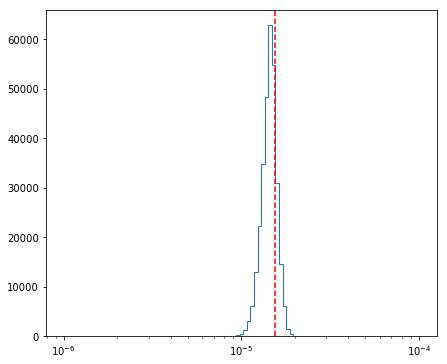

In [21]:
plt.figure(figsize=(7,6))#data[176590, :]*1.0e6
bins = np.logspace(-6,-4,100)
plt.hist(data[:, 12], bins=bins, histtype='step')
plt.axvline(data[176590, 12], color='r', ls='--')
plt.xscale('log')
plt.show()

In [11]:
print data[140821, :]

[  9.05472541e-07   2.20404330e-06   9.85392197e-07   1.01781677e-06
   8.54740135e-08   2.41623863e-06   1.67050838e-06   3.00797141e-06
   1.28579999e-07   8.54715087e-06   1.22814354e-05   2.24684064e-05
   1.34772248e-05   2.52164058e-05   1.17538154e-05   1.05427755e-05]


In [3]:
filePrefix = DTD + '/MCMC_DTD_fits/'
objName = 'RRLyrae'

#All the data are in units of PNe/1.0e6 solar masses.
data_nominal, header = fits.getdata(filePrefix+'LMC_MCMC_DTD_' + objName + '_MediumB_Nominal.fits', 0, header=True)
data_low, header     = fits.getdata(filePrefix+'LMC_MCMC_DTD_' + objName + '_MediumB_Lowlim.fits', 0, header=True)
data_high, header    = fits.getdata(filePrefix+'LMC_MCMC_DTD_' + objName + '_MediumB_Highlim.fits', 0, header=True)

ndim         = data_nominal.shape[2]
data_nominal = data_nominal.reshape((-1, ndim))
data_low     = data_low.reshape((-1, ndim))
data_high    = data_high.reshape((-1, ndim))

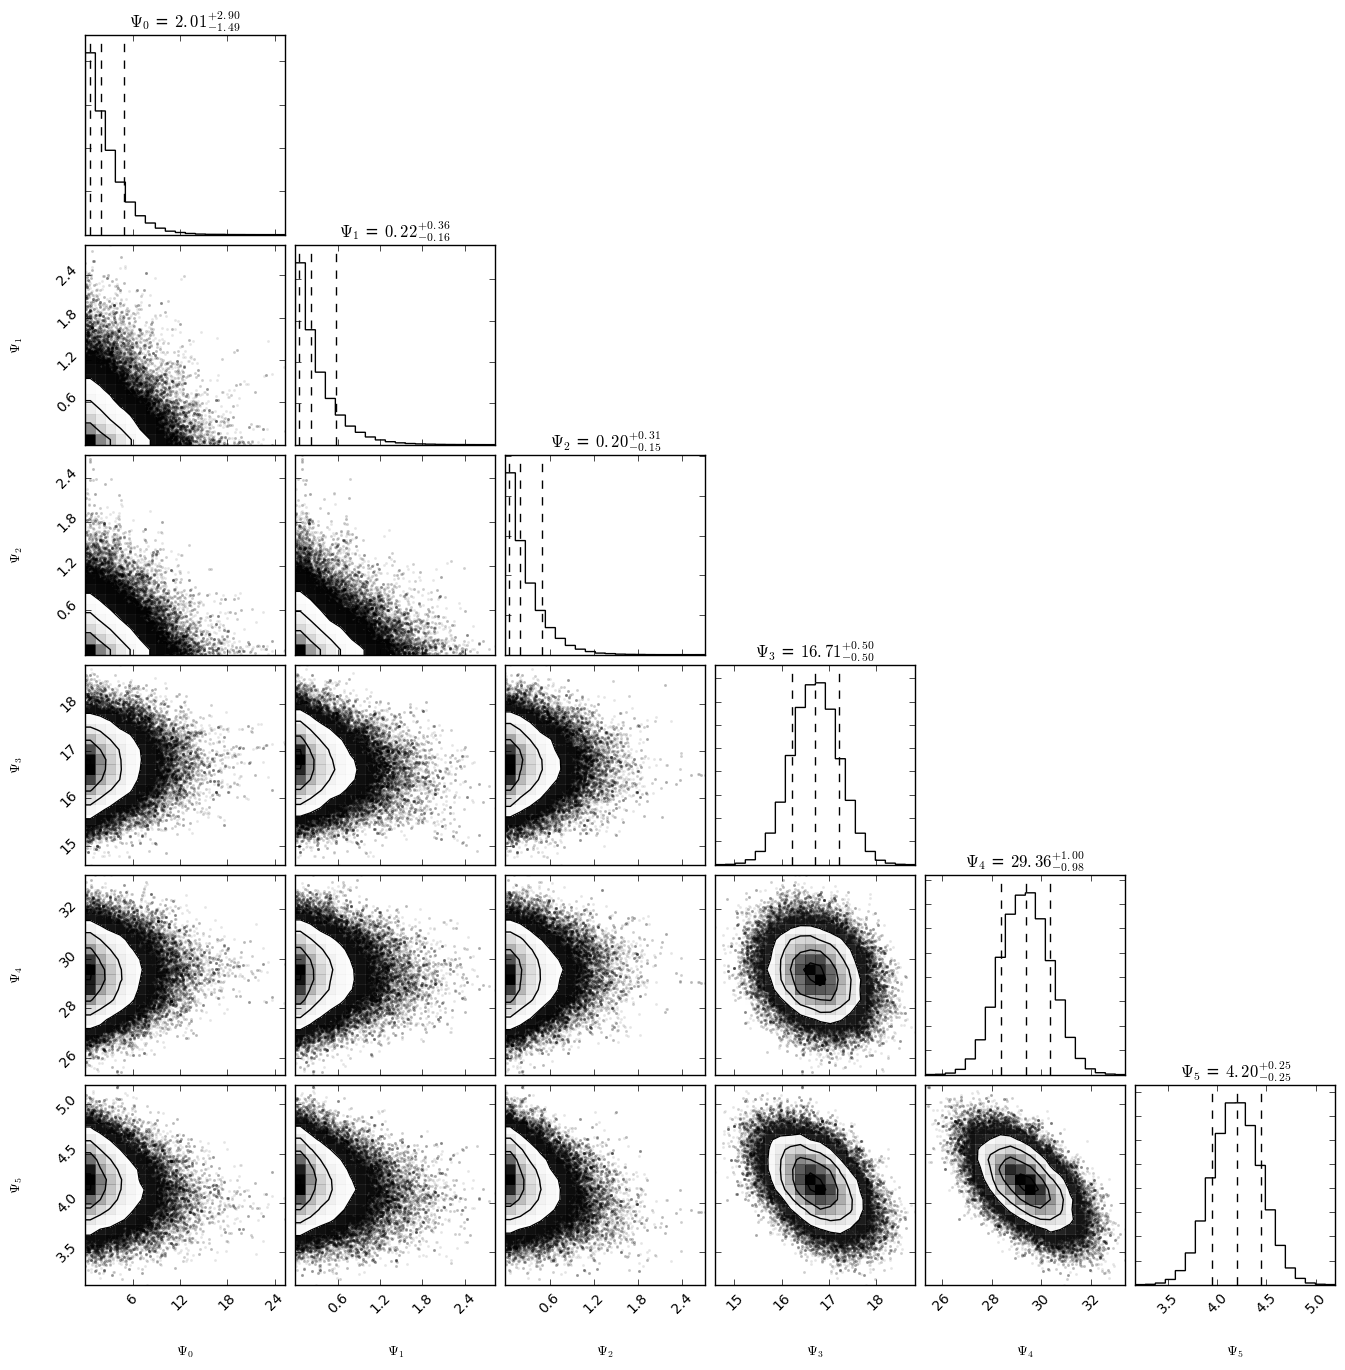

In [5]:
fig = corner.corner(data_high*1.0e6, labels=[r'$\Psi_0$',r'$\Psi_1$',r'$\Psi_2$',r'$\Psi_3$',r'$\Psi_4$',r'$\Psi_5$'],\
               quantiles=[0.16, 0.5, 0.84],  show_titles=True, title_kwargs={"fontsize": 12})

[  1.32287566e+07   1.67332005e+08   1.26491106e+09   3.16227766e+09
   6.32455532e+09   1.26491106e+10]


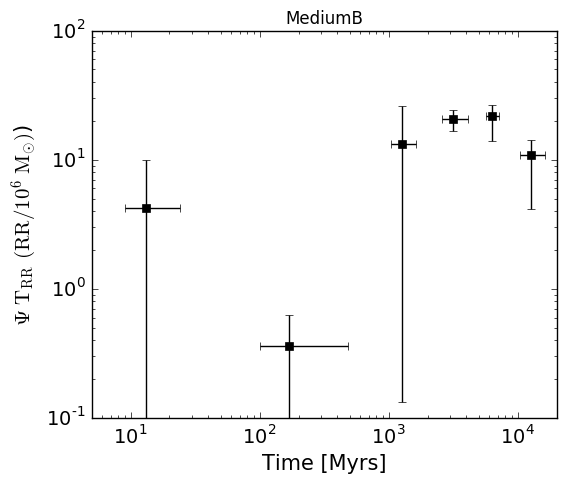

In [6]:
psi_Tpn_median_low     = np.array([np.median(data_low[:,binnum]) for binnum in range(6)])
psi_Tpn_median_high    = np.array([np.median(data_high[:,binnum]) for binnum in range(6)])
psi_Tpn_median_nominal = np.array([np.median(data_nominal[:,binnum]) for binnum in range(6)])

psi_Tpn_1sigma_nominal_up   = np.array([(np.percentile(data_nominal[:,binnum], 84) - psi_Tpn_median_nominal[binnum]) \
                                         for binnum in range(6)])
psi_Tpn_1sigma_nominal_down = np.array([(psi_Tpn_median_nominal[binnum] - np.percentile(data_nominal[:,binnum], 16)) \
                                         for binnum in range(6)])

psi_Tpn_1sigma_sad_up   = psi_Tpn_median_high - psi_Tpn_median_nominal
psi_Tpn_1sigma_sad_down = psi_Tpn_median_nominal - psi_Tpn_median_low

psi_Tpn_error_up   = np.sqrt(psi_Tpn_1sigma_nominal_up**2 + psi_Tpn_1sigma_sad_up**2)
psi_Tpn_error_down = np.sqrt(psi_Tpn_1sigma_nominal_down**2 + psi_Tpn_1sigma_sad_down**2)

ageBins         = np.array([5, 35, 800, 2000, 5000, 8000, 20000])*1.0e6
logAgeCentroids = np.log10(ageBins)[:-1] + (np.log10(ageBins[1:])-np.log10(ageBins[:-1]))/2.0
ages            = (10**logAgeCentroids)
print ages

plt.figure(figsize=(6,5))
plt.errorbar(ages/1.0e6, psi_Tpn_median_nominal*1.0e6, yerr=(psi_Tpn_error_up*1.0e6, psi_Tpn_error_down*1.0e6), \
             xerr=((ages-ageBins[:-1])/2.0e6, (ageBins[1:]-ages)/2.0e6), fmt='ks')
plt.xscale('log')
plt.yscale('log')
plt.title('MediumB')
plt.xlabel('Time [Myrs]', fontsize=15)
plt.xlim(5.0, 2.0e4)
plt.ylabel(r'$\rm{\Psi\ T_{RR}}$ $\rm{(RR/10^6\ M_{\odot})}$)', fontsize=15)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.show()

[  1.32287566e+07   1.67332005e+08   1.26491106e+09   3.16227766e+09
   6.32455532e+09   1.26491106e+10]


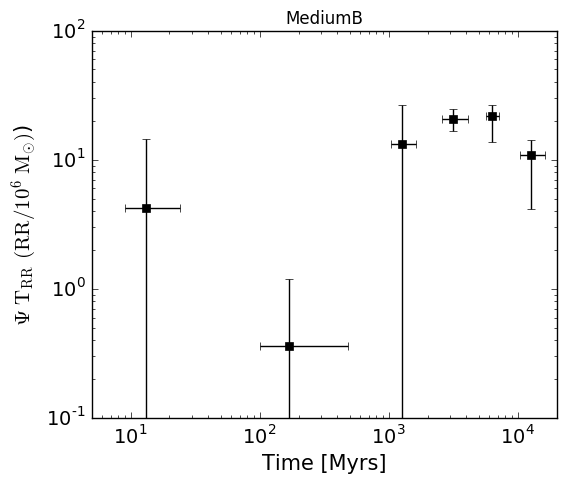

In [10]:
psi_Tpn_median_low    = np.array([np.median(data_low[:,binnum]) for binnum in range(6)])
psi_Tpn_median_high = np.array([np.median(data_high[:,binnum]) for binnum in range(6)])
psi_Tpn_median_nominal = np.array([np.median(data_nominal[:,binnum]) for binnum in range(6)])

psi_Tpn_1sigma_nominal = np.array([(np.percentile(data_nominal[:,binnum], 84) - np.percentile(data_nominal[:,binnum], 16)) for binnum \
                                      in range(6)])

psi_Tpn_1sigma_sad_up = psi_Tpn_median_high - psi_Tpn_median_nominal
psi_Tpn_1sigma_sad_down = psi_Tpn_median_nominal - psi_Tpn_median_low

psi_Tpn_error_up = np.sqrt(psi_Tpn_1sigma_nominal**2 + psi_Tpn_1sigma_sad_up**2)
psi_Tpn_error_down = np.sqrt(psi_Tpn_1sigma_nominal**2 + psi_Tpn_1sigma_sad_down**2)

ageBins = np.array([5, 35, 800, 2000, 5000, 8000, 20000])*1.0e6
logAgeCentroids = np.log10(ageBins)[:-1] + (np.log10(ageBins[1:])-np.log10(ageBins[:-1]))/2.0
ages = (10**logAgeCentroids)
print ages

plt.figure(figsize=(6,5))
plt.errorbar(ages/1.0e6, psi_Tpn_median_nominal*1.0e6, yerr=(psi_Tpn_error_up*1.0e6, psi_Tpn_error_down*1.0e6), \
             xerr=((ages-ageBins[:-1])/2.0e6, (ageBins[1:]-ages)/2.0e6), fmt='ks')
plt.xscale('log')
plt.yscale('log')
plt.title('MediumB')
plt.xlabel('Time [Myrs]', fontsize=15)
plt.xlim(5.0, 2.0e4)
plt.ylabel(r'$\rm{\Psi\ T_{RR}}$ $\rm{(RR/10^6\ M_{\odot})}$)', fontsize=15)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.show()

In [24]:
np.argmax([-90, -20, -2])

2